In [2]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the Dataset
df = pd.read_csv("advertising.csv")
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# 3. Explore the Data
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
df.describe()


Shape of dataset: (200, 4)

Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


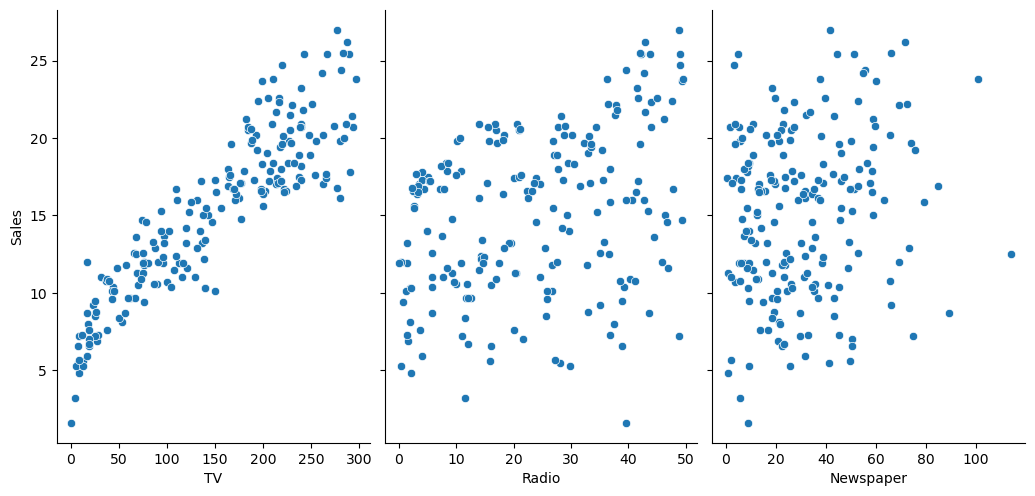

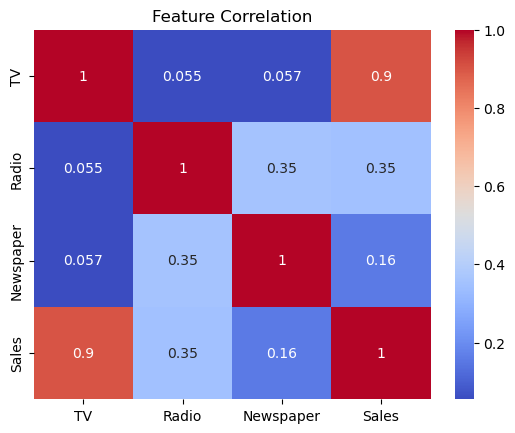

In [4]:
# 4. Visualize Relationships
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.7, kind='scatter')
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [5]:
# 5. Prepare Data for Modeling
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


In [6]:
# 6. Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 7. Train a Linear Regression Model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [8]:
# 8. Evaluate the Model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))



Mean Squared Error: 2.9077569102710923
R² Score: 0.9059011844150826


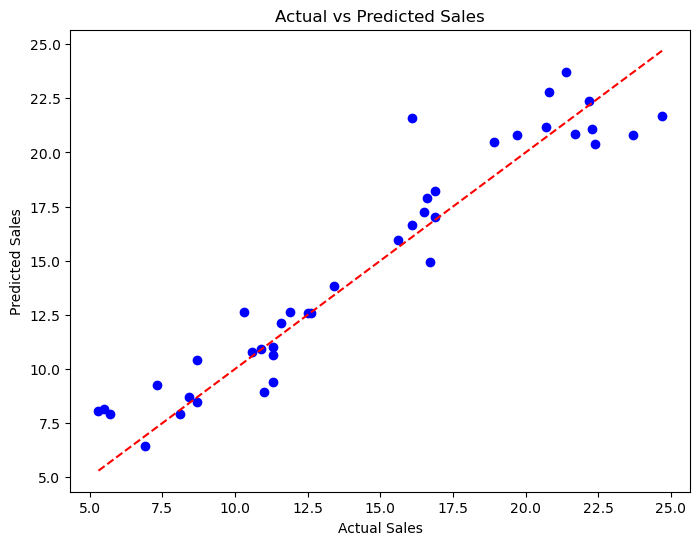

In [9]:
# 9. Visualize Actual vs Predicted Sales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


In [10]:
# 10. Optional: Try Random Forest Regressor for comparison
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest R² Score:", r2_score(y_test, rf_pred))


Random Forest R² Score: 0.9534827934927883
